In this chapter, you will consolidate your knowledge of interacting with APIs in a deep dive into the Twitter streaming API. You'll learn how to stream real-time Twitter data and to analyze and visualize it!

# The Twitter API and Authentication

## Herein, you’ll learn
- How to stream data from the Twi!er API
- How to filter incoming tweets for keywords
- About API Authentication and OAuth
- How to use the Tweepy Python package

## Twitter has a number of APIs
-REST APIs
- Streaming APIs

## Using Tweepy: Authentication handler
```python
import tweepy, json
access_token = "..."
access_token_secret = "..."
consumer_key = "..."
consumer_secret = "..."
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
```

## Tweepy: define stream listener class

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")
    
    def on_status(self, status):
        tweet = status._json
        self.file.write(json.dumps(tweet) + '\n')
        tweet_list.append(status)
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()


## Using Tweepy: stream tweets!!

```python
# Create Streaming object and authenticate
l = MyStreamListener()
stream = tweepy.Stream(auth, l)
# This line filters Twitter Streams to capture data by keywords:
stream.filter(track=['apples', 'oranges'])```

---
# Let's Practice

In [4]:
#!pip install tweepy

In [3]:
# Import package
import tweepy

# Store OAuth authentication credentials in relevant variables
access_token = "1092294848-aHN7DcRP9B4VMTQIhwqOYiB14YkW92fFO8k8EPy"
access_token_secret = "X4dHmhPfaksHcQ7SCbmZa2oYBBVSD2g8uIHXsp5CTaksx"
consumer_key = "nZ6EA0FxZ293SxGNg8g8aP0HM"
consumer_secret = "fJGEodwe3KiKUnsYJC3VRndj7jevVvXbK2D5EiJ2nehafRgA6i"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, 1)


# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=['clinton', 'trump', 'sanders', 'cruz'])


AttributeError: 'int' object has no attribute 'on_exception'

In [9]:
# Import package
import json

# String of path to file: tweets_data_path
tweets_data_path = 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
print(tweets_data[0].keys())

IndexError: list index out of range

In [10]:
# Import package
import pandas as pd

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang'])

# Print head of DataFrame

print(df.head())

Empty DataFrame
Columns: [text, lang]
Index: []


In [11]:
# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])

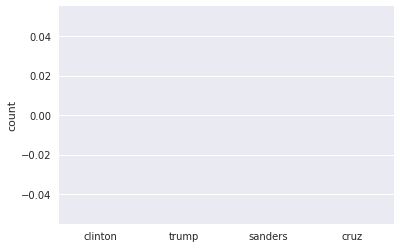

In [13]:
# Import packages

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()